## Feature seletion_1 

### Objectives
* Feature Selection vs Feature Engineering vs Dimensionality Reduction
* Feature Selection Methods
* Filter Methods
* Wrapper Methods
* Embedded Methods
* Hybrid Methods
* Advanced Methods


### Feature selection vs Feature Engineering vs Dimensionality Reduction
* Feature selection: It is a process by which we reduce the the number of features that is considerd in machine learning
  - Benfits models more interpreyable ,less training time i.e more generalized model
* Fearture engineering : It is all about data preprocessing to make model more effictive. It transforms data in a such a way that model performs better ,Benfits : Improved model accuracy 
* Dimensionality Reduction :Techniques like SVD,PCA etc  which transforms features to lower dimension is called dimensionality reduction. Benfits: Faster model ,improved accuracy

### Feature selection methids :
* Filter Methods : Simple way of choosing features that you think will have impact in target without any ML algorithm 
* Wrapper methods : It uses ML algos to identify the sub set of features which will be better predictor.Dependent on algo 
* Embedded methods : 

### Filter Methods for for feature selection 
* Feature selection method Independently of ML algo 
* Based on charectersitics of the data 
* These are simple and quick ways of feature selection 

### Advantages :
* Selected features can be used for all ML algo . This means if you change the ML algo ,no need to change the feature selected 
* Computationally not so expensive 
<hr>

### Types 
* Univariate Fiter based methods 
   - These methods treat each feature Independently 
* Multivariate filter based methods 
   - They will use the relationship between the features 

## Filter methods 
#### Basic

* Constant or  Qusi constanr features 

In [1]:
from sklearn.feature_selection import VarianceThreshold

In [2]:
vt = VarianceThreshold(threshold = 0.2)

In [3]:
import pandas as pd
df = pd.DataFrame({'A':['m','f','m','m','m','m','m','m'], 
              'B':[1,2,3,1,2,1,1,1], 
              'C':[1,2,3,1,2,1,1,1]})

In [4]:
from sklearn.preprocessing import OrdinalEncoder

In [5]:
oe = OrdinalEncoder()

In [6]:
df['A'] = oe.fit_transform(df[['A']])

In [7]:
df

,A,B,C
0,1.0,1,1
1,0.0,2,2
2,1.0,3,3
3,1.0,1,1
4,1.0,2,2
5,1.0,1,1
6,1.0,1,1
7,1.0,1,1


In [8]:
vt.fit_transform(df)

array([[1., 1.],
       [2., 2.],
       [3., 3.],
       [1., 1.],
       [2., 2.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [9]:
vt.variances_

array([0.109375, 0.5     , 0.5     ])

* **Dropping duplicated columns** 

### Correlation Filter 
* correlation is measured as linear relationship between two quantitive columns.It tells how one variable depends on other.
* Say we have three features A,B,c & and one target T . To find out important features for model predicting T,we need measure the corelation between A&T,B&T,C&t.
* **If we see A&B are correlated ,what to do?**
* *Ans: A&B provide redundent information for predicying T,Thus one of them should be removed*

<hr>
* Three ways  of calculating the correlation - Pearson,Spearman,Kemdell

In [10]:
import pandas as pd

In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/winequality-white.csv', sep=';')

In [12]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [13]:
corr = df.corr(method='pearson')

In [14]:
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [15]:
import numpy as np

In [16]:
np.abs(corr.loc['fixed acidity']).sort_values(ascending=False)

fixed acidity           1.000000
pH                      0.425858
citric acid             0.289181
density                 0.265331
alcohol                 0.120881
quality                 0.113663
total sulfur dioxide    0.091070
residual sugar          0.089021
free sulfur dioxide     0.049396
chlorides               0.023086
volatile acidity        0.022697
sulphates               0.017143
Name: fixed acidity, dtype: float64

### Chi-squared method
* Used for testing relatonship between categorical variables(binary targets ,counts etc)
* It calculates the relationship between all features & targets (both categorical)

In [17]:
from sklearn.feature_selection import chi2,SelectKBest

In [18]:
cols = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship'
        ,'race','sex','capital-gain','capital-loss','hours-per-week','native-country','Salary']
adult_data = pd.read_csv('https://raw.githubusercontent.com/zekelabs/data-science-complete-tutorial/master/Data/adult.data.txt', names=cols)

In [19]:
cat_adult_data = adult_data.select_dtypes(include=['object'])

In [20]:
oe = OrdinalEncoder()

In [21]:
data_td = oe.fit_transform(cat_adult_data)

In [22]:
df = pd.DataFrame(data_td, columns=list(cat_adult_data.columns.values))

In [23]:
chi_2, pval = chi2(df.drop(columns=['Salary']), df.Salary)

In [24]:
pval

array([5.47766026e-012, 9.24882165e-067, 2.61759457e-246, 9.68421957e-112,
       0.00000000e+000, 9.06868555e-009, 2.80029903e-111, 2.23877386e-004])

In [25]:
chi_2

array([  47.50811916,  297.94227041, 1123.46981798,  504.5588538 ,
       3659.14312486,   33.03130514,  502.43941948,   13.61925602])

In [26]:
feature_importences = pd.Series(chi_2,index=list(df.drop(columns=['Salary']).columns.values))

In [27]:
feature_importences.sort_values(ascending=True)

native-country      13.619256
race                33.031305
workclass           47.508119
education          297.942270
sex                502.439419
occupation         504.558854
marital-status    1123.469818
relationship      3659.143125
dtype: float64

In [28]:
fs = SelectKBest(k=4,score_func=chi2)

In [29]:
fs.fit_transform(df.drop(columns=['Salary']),df.Salary)

array([[4., 1., 1., 1.],
       [2., 4., 0., 1.],
       [0., 6., 1., 1.],
       ...,
       [6., 1., 4., 0.],
       [4., 1., 3., 1.],
       [2., 4., 5., 0.]])

In [30]:
fs.scores_

array([  47.50811916,  297.94227041, 1123.46981798,  504.5588538 ,
       3659.14312486,   33.03130514,  502.43941948,   13.61925602])

* **PS: correlation is for finding the relationship between the continues features and continues target.Chi2 is for finding the relationship between the categorical features and categorical targets** 

##### **ANOVA Univariate test**
* suited if feature is continues and normally distributed 
* Target can be discrete/categorical,f_classif
* Target can also be continues ,f_regressor 

In [31]:
df = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/winequality-white.csv', sep=';')

In [32]:
from sklearn.feature_selection import f_classif
fs = SelectKBest(k=8,score_func=f_classif)

In [33]:
feature_data = fs.fit_transform(df.drop(columns=['quality']), df.quality)

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lr = LogisticRegression()

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
trainX, testX, trainY, testY = train_test_split(feature_data, df.quality)

In [38]:
lr.fit(trainX, trainY)

C:\Users\saket\Anaconda333\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [39]:
lr.score(testX,testY)

0.4579591836734694

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dt = DecisionTreeClassifier()

In [42]:
dt.fit(trainX, trainY)

DecisionTreeClassifier()

In [43]:
dt.score(testX,testY)

0.6024489795918367

# Feature selection _2 

* Introduction to wrapper methods
* Advantages of wrapper methods 
* Process of Wrapper methods 

### wrapper methods 
* Using iterative process,we will try to figure out best subset of features for which ML algorithms is giving best accuracy 
* This process is dependent on ML algo 
* when ever we change the algo the selected features also changes 

#### Advantages
* It does  the feature selection based on the accuracy of the model 
* It also accounts the interaction of the model 

### Process of applying wrapper methods
* Search for the subset of features 
* Build model using subset 
* Evaluate trained model with chosen metrices 
* Iterate repeat till you suceed 

In [44]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/winequality-white.csv', sep=';')
def f(r):
    if r <= 3:
        return 1
    elif r<= 6:
        return 2
    else:
        return 3

df.quality = df.quality.map(f)


In [45]:
df.sample(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
461,7.0,0.25,0.29,15.2,0.047,40.0,171.0,0.99820,3.22,0.45,9.3,2
2899,6.2,0.21,0.26,13.1,0.050,59.0,150.0,0.99772,3.31,0.46,9.0,2
2627,7.8,0.17,0.23,1.7,0.029,39.0,128.0,0.99272,3.37,0.41,10.7,3


In [46]:
df.quality.value_counts()

2    3818
3    1060
1      20
Name: quality, dtype: int64

In [47]:
features = list(df.columns.values)

In [48]:
features.remove('quality')

In [49]:
features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

### Searching subset of features 
* **Start small** Start with one feature and keep on adding .Stop where your models stop improving 
* **start Big** - Start with all features and keep on removing
* **Randamize or try all possible combinations** 

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
from sklearn.model_selection import train_test_split

In [52]:



try_features = []
for feature in features:
    try_features.append(feature)
    dt = DecisionTreeClassifier()
    trainX,testX,trainY,testY = train_test_split(df[try_features],df.quality)
    dt.fit(trainX,trainY)
    print (dt.score(testX,testY))

0.7926530612244898
0.76
0.7714285714285715
0.7706122448979592
0.7991836734693878
0.7983673469387755
0.7893877551020408
0.8089795918367347
0.8228571428571428
0.8310204081632653
0.8187755102040817


### Dusadvantages of these process 
* Lot of computation required 

### Notes
* MIextend is additional scikit learn package which makes features easy 

In [53]:
import mlxtend

In [54]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [55]:
sfs = SequentialFeatureSelector(k_features=5,estimator=DecisionTreeClassifier())

In [56]:
sfs.fit(trainX,trainY)

SequentialFeatureSelector(estimator=DecisionTreeClassifier(), k_features=5)

In [57]:
sfs.k_feature_names_

('volatile acidity', 'residual sugar', 'free sulfur dioxide', 'pH', 'alcohol')

In [58]:
sfs.k_score_

0.811598732135906

In [59]:
for k in range(4,10):
    sfs = SequentialFeatureSelector(k_features=k,estimator=DecisionTreeClassifier())
    sfs.fit(trainX,trainY)
    print(k,sfs.k_score_,sfs.k_feature_names_)

4 0.8072416541548499 ('volatile acidity', 'residual sugar', 'pH', 'alcohol')
5 0.8110482122004115 ('residual sugar', 'density', 'pH', 'sulphates', 'alcohol')
6 0.8132276779921778 ('volatile acidity', 'residual sugar', 'density', 'pH', 'sulphates', 'alcohol')
7 0.8124161708280042 ('volatile acidity', 'residual sugar', 'chlorides', 'density', 'pH', 'sulphates', 'alcohol')
8 0.8224890174053273 ('fixed acidity', 'volatile acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol')
9 0.8069758475597324 ('volatile acidity', 'citric acid', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol')


In [60]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector

In [61]:
efs = ExhaustiveFeatureSelector(estimator=DecisionTreeClassifier(),min_features=4,max_features=10,scoring='accuracy')

In [62]:
efs.fit(trainX,trainY)

Features: 1815/1815

ExhaustiveFeatureSelector(estimator=DecisionTreeClassifier(), max_features=10,
                          min_features=4)

In [63]:
efs.best_feature_names_

('fixed acidity',
 'volatile acidity',
 'residual sugar',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates')

In [64]:
efs.best_score_

0.8243952621920702

### Feature selection-3

###### Objectives 
* Introduction to embbeded methods 
* Advantages 
* Process 
* Introduction to Hybrid methods
* Advantages 
* Process

### Introduction to embbeded methods 
* Feature selections happens during model training thats why its called Embbeded methods 

### Advantages 
* Feature interaction with target is considered(advantage of wrapper method) 
* Fast like filter based methods 
* more accurate than filter based methods 
* Less prone to overfitting 

### Methods :
* Regularization 
* Tree Based methods 

### Regularization method
* Using regularization technique,the learned weights (w0,w1....) are thersholded so that there individual impact on the prediction is reduced 
* By tapping down the featur, it makes sure that some specific features dont become over important.

In [65]:
#Regularization in linear models 
from sklearn.linear_model import Lasso,Ridge,ElasticNet,LinearRegression

In [66]:
import pandas as pd
data = pd.DataFrame([[0,0,0],[0,0,.1],[1,1,1]], columns=['A','B','Y'])

In [67]:
data

,A,B,Y
0,0,0,0.0
1,0,0,0.1
2,1,1,1.0


In [68]:
lasso = Lasso(alpha=.1)

In [69]:
lasso.fit(data[['A','B']],data.Y)

Lasso(alpha=0.1)

In [70]:
lasso.coef_

array([0.5, 0. ])

In [71]:
lr = LinearRegression()

In [72]:
lr.fit(data[['A','B']],data.Y)

LinearRegression()

In [73]:
lr.coef_

array([-1.47086948e+14,  1.47086948e+14])

PS:Feature selcetion is happening as part of model training 

##### Penalty calculations need to be understood 
* L1 Regularization - Shrinks come of the coeffs to zero thus suited for lazzo regularization 
* L2 Regularization - It doesnt set the weight to be Zero 

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
lr = LogisticRegression(penalty='l1')

Ps: This is how we achive embedded methods for LogisticRegression 

### Tree based feature importances :
* Tree based models like random forests 

#### Random forest
* Base Understanding,train empty trees with different subset of data and it will generate different trees 
* For doing the prediction(classification),all the partisipenting trees predict and majority decides the prediction
* These composition of trees is known as RandomForest 

In [77]:
from sklearn.datasets import  load_digits 

In [78]:
digits = load_digits()

In [80]:
#digits

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline

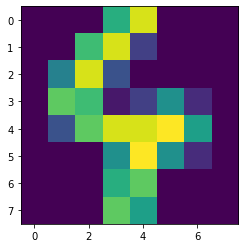

In [86]:
plt.imshow(digits.images[110])

In [87]:
digits.data[110]

array([ 0.,  0.,  0., 10., 15.,  0.,  0.,  0.,  0.,  0., 11., 15.,  3.,
        0.,  0.,  0.,  0.,  7., 15.,  4.,  0.,  0.,  0.,  0.,  0., 12.,
       11.,  1.,  3.,  8.,  2.,  0.,  0.,  4., 12., 15., 15., 16.,  9.,
        0.,  0.,  0.,  0.,  8., 16.,  8.,  2.,  0.,  0.,  0.,  0., 10.,
       12.,  0.,  0.,  0.,  0.,  0.,  0., 12.,  9.,  0.,  0.,  0.])

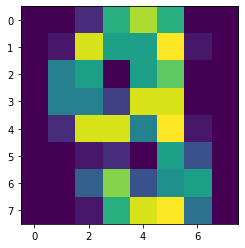

In [91]:
plt.imshow(digits.images[555])

In [92]:
digits.target[555]


9

In [93]:
from sklearn.tree import DecisionTreeClassifier

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
trainX,testX,trainY,testY = train_test_split(digits.data,digits.target)

In [96]:
dt = DecisionTreeClassifier()

In [97]:
dt.fit(trainX, trainY)

DecisionTreeClassifier()

In [98]:
dt.score(testX, testY)

0.8311111111111111

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
rf = RandomForestClassifier(n_estimators=1000, n_jobs=-1)

In [101]:
rf.fit(trainX, trainY)

RandomForestClassifier(n_estimators=1000, n_jobs=-1)

In [102]:
rf.score(testX, testY)

0.9711111111111111

In [103]:
import numpy as np
import numpy as np
np.round(rf.feature_importances_,2)

array([0.  , 0.  , 0.02, 0.01, 0.01, 0.02, 0.01, 0.  , 0.  , 0.01, 0.03,
       0.01, 0.02, 0.03, 0.01, 0.  , 0.  , 0.01, 0.02, 0.02, 0.03, 0.05,
       0.01, 0.  , 0.  , 0.01, 0.04, 0.02, 0.03, 0.03, 0.03, 0.  , 0.  ,
       0.03, 0.03, 0.02, 0.04, 0.02, 0.03, 0.  , 0.  , 0.01, 0.04, 0.04,
       0.02, 0.02, 0.02, 0.  , 0.  , 0.  , 0.02, 0.02, 0.01, 0.02, 0.02,
       0.  , 0.  , 0.  , 0.02, 0.01, 0.03, 0.03, 0.02, 0.  ])

### Introduction to Hybrid methods 
* rather then using the single approach to do model sub set selection ,Hybrid methods use combine different approaches to get the best possible feature subset 
* It's like starting with filter based methods to remove contant of similar data
* followed by wrapper based methods 

### Advantages 
* High accuracy models 
* Robust models 

### Process 
* Using Filter & Wrapper methods 
 - **Using f_classif choose some important (reduces the feature space) 100 - 75**
 - **Using SequentialFeatureSelector get top features from the selected ones 75-25**
* Using Embedded & Wrapper methods 
 - **Lasso for identifying important features or decision tree**
 - **choosing top 50% features & applying wrapper methods**

### Fancy way of naming the above things 
* Reducing the feature dimension using incremental techniques 

In [104]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/winequality-white.csv', sep=';')
def f(r):
    if r <= 3:
        return 1
    elif r<= 6:
        return 2
    else:
        return 3

df.quality = df.quality.map(f)

In [105]:
features = list(df.columns.values)

In [106]:
features.remove('quality')

In [107]:
dt = DecisionTreeClassifier()

In [108]:
dt.fit(df[features], df.quality)

DecisionTreeClassifier()

In [109]:
fi = pd.Series(dt.feature_importances_, index=features)

In [110]:
fi

fixed acidity           0.060164
volatile acidity        0.091700
citric acid             0.064959
residual sugar          0.096954
chlorides               0.075578
free sulfur dioxide     0.086980
total sulfur dioxide    0.068387
density                 0.093998
pH                      0.080335
sulphates               0.069101
alcohol                 0.211843
dtype: float64

In [112]:
top5 = list(fi.sort_values(ascending=False)[:5].index)

In [113]:
top5

['alcohol',
 'residual sugar',
 'density',
 'volatile acidity',
 'free sulfur dioxide']

In [114]:
feature_data = df[top5]

In [115]:
rf = RandomForestClassifier(n_estimators=1000)

In [116]:
trainX, testX, trainY, testY = train_test_split(feature_data, df.quality)

In [117]:
rf.fit(trainX, trainY)

RandomForestClassifier(n_estimators=1000)

In [118]:
rf.score(testX, testY)

0.8587755102040816

### Some reading assignments
* Probability Basics & Conditional Probability
* https://developers.google.com/machine-learning/guides/good-data-analysis
* https://developers.google.com/machine-learning/guides/rules-of-ml